# Assignment 2: Evaluation and selection of decision models


In [ ]:
# importing librarie
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

# loading the Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
data, labels = iris.data, iris.target

# initial splitting into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)

In [ ]:
d=pd.DataFrame(labels)
d.value_counts()

0    50
1    50
2    50
dtype: int64

The train_test_split function of scikit-learn allows us to randomly split the dataset into two partitions train (learning) and test (evaluation) according to arbitrary proportions.

As usual, it is interesting to visualize the data available to us. We can construct the scatter plots in two dimensions using Matplotlib:

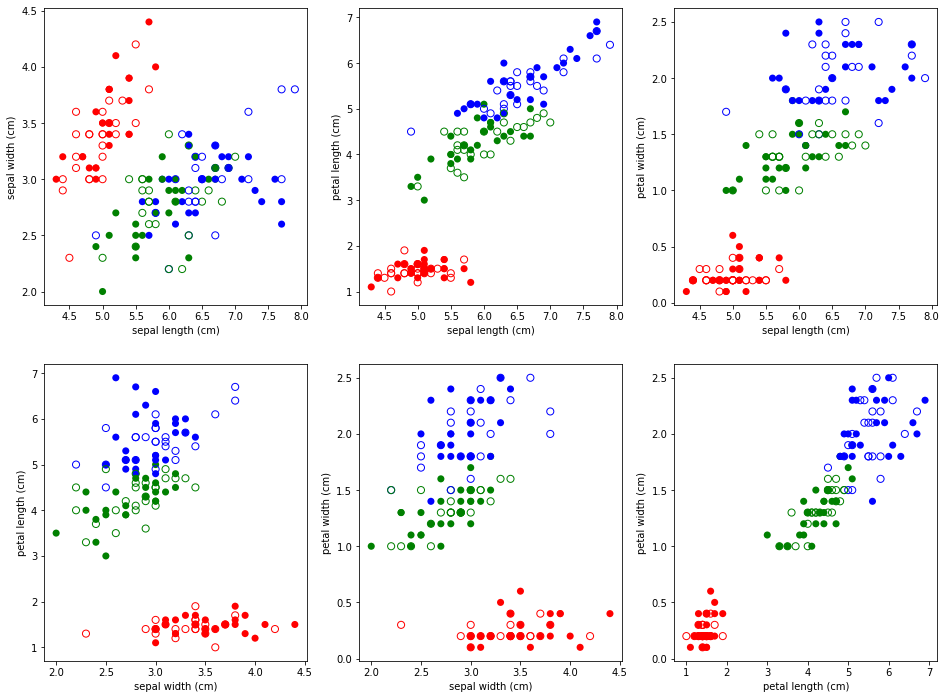

In [ ]:
fig = plt.figure(figsize=(16, 12))
n_features = data.shape[1]
n_plots = 6
idx = 1
cmp = np.array(['r', 'g', 'b'])
for dim1 in range(0, n_features):
    for dim2 in range(dim1+1, n_features):
        fig.add_subplot(2, n_plots // 2, idx)
        plt.scatter(X_train[:, dim1], X_train[:, dim2],c=cmp[y_train], s=50, edgecolors='none')
        plt.scatter(X_test[:,  dim1], X_test[:, dim2], c='none',  s=50, edgecolors=cmp[y_test])
        plt.xlabel(iris.feature_names[dim1])
        plt.ylabel(iris.feature_names[dim2])
        idx += 1
plt.show()

## Question 1

Why do we have six different point clouds? What does each figure represent?

We choose two out of the four cases, leading to a total of six pairs.
4!/2!2!=6

1- Sepal width 
2- Sepal length 
3- Petal width 
4- Petal length

**What does each figure represent**

Iris-Setosa 0 red
Iris-Versicolour 1 green
Iris-Virginica 2 blue
according the colur and class of y and
the above plot: the first plot (sepal
lenght-sepal width) shows that Iris-Setosa
that is red has the least sepal lenght and
the highest sepal width in train and test
data  from 3 to 4.5 cm data and after it
Iris-Versicolou   which is green has the 
sepal length between 5 and 7 and sepal 
width between 2 and 3.5 in test and train
data and finally Virginica has the highest
sepal lenght between 5 and 8 but in sepal
width is the same as Versicolour.

the second plot (sepal lenght-petal lenght) shows that Iris-Setosa that is red has the least sepal lenght and petal lenght in train and test data and after it Iris-Versicolour which is green has the sepal length between 5 and 7 and petal lenght between 3 and 5 in test and train data and finally Virginica has the highest sepal lenght between 5 and 8 and petal lenght between 6 and 8.

the third plot (sepal lenght-petal width) shows that Iris-Setosa that is red has the least sepal lenght and petal width in train and test data and after it Iris-Versicolour which is green has the sepal length between 5 and 7 and petal width between 1 and 1.7 in test and train data and finally Virginica has the highest sepal lenght between 5 and 8 and petal width between 1.5 and 2.5.

the forth plot (sepal width-petal lenght) shows that Virginica has blue has the highest petal lenght between 5 and 7 after that Iris-Versicolour which is green has the petal length between 3 and 5 and sepal width between 2 and 3.5 in test and train data. Finally Iris-Setosa that is red has the least petal width and the highest sepal width in train and test data.

the forth plot (sepal width-petal lenght) shows that Virginica has blue has the highest petal lenght between 5 and 7 after that Iris-Versicolour which is green has the petal length between 3 and 5 and the least sepal width between 2 and 3.5 in test and train data. Finally Iris-Setosa that is red has the least petal lenght and the highest sepal width in train and test data.

the fifth plot (sepal width-petal width) shows that Virginica has blue has the highest petal width between 1.5 and 2.5 after that Iris-Versicolour which is green has the petal width between 1 and 1.6 and the least sepal width between 2 and 3.5 in test and train data. Finally Iris-Setosa that is red has the least petal width and the highest sepal width in train and test data.

the sixth plot (petal lenght-petal width) shows that Iris-Setosa that is red has the least petal width and petal lenght in train and test data and after it Iris-Versicolour which is green has the petal width between 0.1 and 0.6 and petal lenght between 3 and 5 in test and train data and finally Virginica has the highest petal width and highest petal lenght.

In [ ]:
# Using MLP
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1, tol=5e-3)

To estimate generalization error, we will use K-fold cross-validation. This will allow us to adjust, if necessary, the hyperparameters of the decision model. scikit-learn implements various cross-validation strategies in the sklearn.model_selection module. Let start by experimenting with the K-fold approach. The KFold object has a .split() method that generates lists of observation indices to be used for the training subset and for the validation subset. More details on this object can be found in the [K-Fold documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

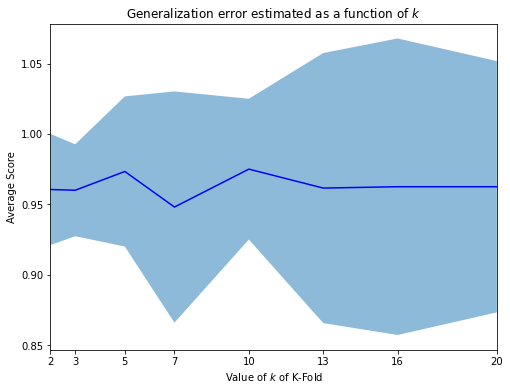

In [ ]:
# KFold for different values of k
from sklearn.model_selection import KFold

# values of k
n_folds = np.array([2, 3, 5, 7, 10, 13, 16, 20])

# preparing lists to store results
cv_scores = []
cv_scores_std = []

for k in n_folds:    # for each value of k
    kf = KFold(n_splits=k)
    scores = []
    # learning then evaluating a model on each split
    for train_idx, val_idx in kf.split(X_train):
        # learning with .fit()
        clf.fit(X_train[train_idx], y_train[train_idx])
        scores.append(clf.score(X_train[val_idx], y_train[val_idx]))
    # computation of the mean and standard deviation of the obtained performances 
    cv_scores.append(np.mean(scores))
    cv_scores_std.append(np.std(scores))

cv_scores, cv_scores_std = np.array(cv_scores), np.array(cv_scores_std)

# display average performance +- 1 standard deviation for each k
plt.figure(figsize=(8, 6))
plt.plot(n_folds, cv_scores, 'b')
plt.fill_between(n_folds, cv_scores + cv_scores_std, cv_scores - cv_scores_std,
                 alpha=0.5)
plt.xlabel("Value of $k$ of K-Fold")
plt.ylabel("Average Score")
plt.xlim(2, max(n_folds))
plt.xticks(n_folds)
plt.title("Generalization error estimated as a function of $k$")
plt.show()

In [ ]:
np.mean(cv_scores)

0.9629312573391521

In [ ]:
cv_scores,cv_scores_std

(array([0.96052632, 0.96      , 0.97333333, 0.94805195, 0.975     ,
        0.96153846, 0.9625    , 0.9625    ]),
 array([0.03947368, 0.03265986, 0.05333333, 0.08213708, 0.05      ,
        0.09593993, 0.10532687, 0.08926786]))

**Question 2: What do you see when looking at this graph? Add values for k (eg 40, 100, be careful it will take longer…) and examine the graph again.**

Text(0.5, 1.0, 'Generalization error estimated as a function of $k$')

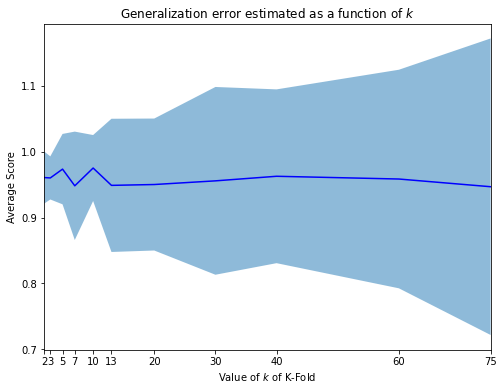

In [ ]:
# KFold for different values of k
from sklearn.model_selection import KFold

# values of k
n_folds = np.array([2,3, 5, 7, 10, 13,20,30, 40,60,75])

# preparing lists to store results
cv_scores = []
cv_scores_std = []

for k in n_folds:    # for each value of k
    kf = KFold(n_splits=k)
    scores = []
    
    # learning then evaluating a model on each split
    for train_idx, val_idx in kf.split(X_train):
      # learning with .fit()
      clf.fit(X_train[train_idx], y_train[train_idx])
      scores.append(clf.score(X_train[val_idx], y_train[val_idx]))
    # computation of the mean and standard deviation of the obtained performances 
    cv_scores.append(np.mean(scores))
    cv_scores_std.append(np.std(scores))

cv_scores, cv_scores_std = np.array(cv_scores), np.array(cv_scores_std)

# display average performance +- 1 standard deviation for each k
plt.figure(figsize=(8, 6))
plt.plot(n_folds, cv_scores, 'b')
plt.fill_between(n_folds, cv_scores + cv_scores_std, cv_scores - cv_scores_std,
                 alpha=0.5)
plt.xlabel("Value of $k$ of K-Fold")
plt.ylabel("Average Score")
plt.xlim(2, max(n_folds))
plt.xticks(n_folds)
plt.title("Generalization error estimated as a function of $k$")

#the answer:
The above plot shows that when we increase **k** from 2 to 10, the average score grows from 0.955 to 0.975, but after that, by boosting k, the average score will be approximately constant or decrease.  
Also after adding some values for k it obviously ilustrates that by the more increase in k not only the average score doesn't increase but also it decrease. 
More importantly, the more increse in k lead to pose excessive cost to model and the model becomes more computationally expensive.  

In [ ]:
"""Question 3: For each model learned by k-fold cross-validation, add its 
evaluation on the test data set aside at the start X_test, y_test.
 Display the curves on the same graph. What do you notice?"""


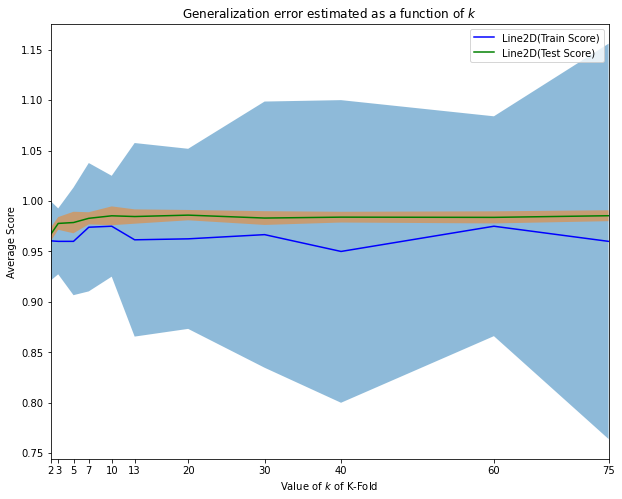

In [ ]:
# KFold for different values of k
from sklearn.model_selection import KFold

# values of k
n_folds = np.array([2,3, 5, 7, 10, 13,20,30, 40,60,75])

# preparing lists to store results
cv_scores = []
cv_test_scores=[]
cv_scores_std = []
cv_test_scores_std=[]

for k in n_folds:    # for each value of k
    kf = KFold(n_splits=k)
    scores = []
    test_scores=[]
    # learning then evaluating a model on each split
    for train_idx, val_idx in kf.split(X_train):
        # learning with .fit()
        clf.fit(X_train[train_idx], y_train[train_idx])
        scores.append(clf.score(X_train[val_idx], y_train[val_idx]))

        test_scores.append(clf.score(X_test, y_test))
    # computation of the mean and standard deviation of the obtained performances 
    cv_scores.append(np.mean(scores))
    cv_test_scores.append(np.mean(test_scores))
    cv_scores_std.append(np.std(scores))
    cv_test_scores_std.append(np.std(test_scores))

cv_scores, cv_scores_std = np.array(cv_scores), np.array(cv_scores_std)
cv_test_scores,cv_test_scores_std=np.array(cv_test_scores), 
np.array(cv_test_scores_std)

# display average performance +- 1 standard deviation for each k
plt.figure(figsize=(10, 8))
ax1, =plt.plot(n_folds, cv_scores, 'b', label="Train Score")
plt.fill_between(n_folds, cv_scores + cv_scores_std, cv_scores - cv_scores_std,
                 alpha=0.5)

ax2, =plt.plot(n_folds, cv_test_scores, 'g',label="Test Score")
plt.fill_between(n_folds, cv_test_scores + cv_test_scores_std, cv_test_scores -
                 cv_test_scores_std, alpha=0.5)

plt.xlabel("Value of $k$ of K-Fold")
plt.ylabel("Average Score")
plt.xlim(2, max(n_folds))
plt.xticks(n_folds)
plt.title("Generalization error estimated as a function of $k$")
plt.legend([ax1,ax2])
plt.show()



In [ ]:
print(f"cv_scores is : {cv_scores} and cv_scores_std is : {cv_scores_std} and 
mean of cv_scores is: {np.mean(cv_scores)}  ")
print(f"cv_test_scores is : {cv_test_scores} and cv_test_scores_std is : 
{cv_test_scores_std} and mean of cv_test_scores is: {np.mean(cv_test_scores)} ")

cv_scores is : [0.9601707  0.96       0.97333333 0.95974026 0.96071429 0.95897436
 0.97083333 0.96111111 0.9625     0.96666667 0.96      ] and cv_scores_std is : [0.01280228 0.03265986 0.03265986 0.06730732 0.08214286 0.07528163
 0.0884865  0.11928284 0.13169567 0.15456031 0.19595918] and mean of cv_scores is: 0.9630949132623773  
cv_test_scores is : [0.98       0.97777778 0.98133333 0.9752381  0.972      0.96820513
 0.97133333 0.97066667 0.97066667 0.97088889 0.9712    ] and cv_test_scores_std is : [0.02       0.01257079 0.01808621 0.01660533 0.0110755  0.01114131
 0.0087178  0.00936503 0.0095219  0.00860376 0.00815843] and mean of cv_test_scores is: 0.9735736263736263 


# **the plot shows that evaluation on the test data set has the same trend compare to train data but the fluctuation of the score in test data is less than train data. Also the score of the test data is more than train data acccoeding above cell mean of cv_scores is: 0.963 while mean of cv_test_scores is: 0.973.**


#"""Question  4: Perform performance estimation using leave one out (LOO) cross-validation. What do you see comparing the results of k-fold and leave one out?"""

# #***answer***

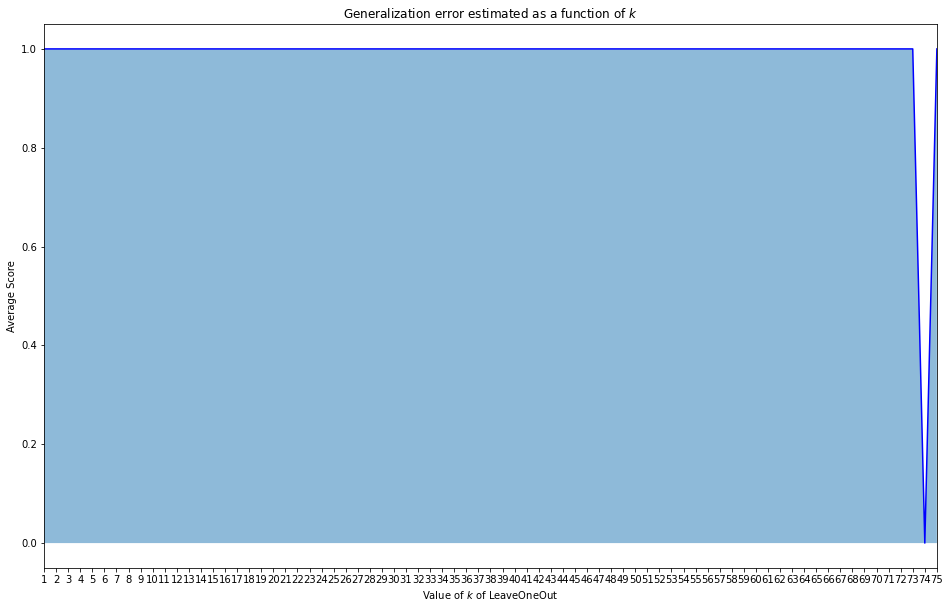

0.9866666666666667

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

# values of k

# preparing lists to store results
cv_scores = []
cv_scores_std = []

#for k in n_folds:    # for each value of k
cv = LeaveOneOut()
scores = []
    # learning then evaluating a model on each split
for train_idx, val_idx in cv.split(X_train):
  # learning with .fit()
  clf.fit(X_train[train_idx], y_train[train_idx])
  scores.append(clf.score(X_train[val_idx], y_train[val_idx]))
  

cv_scores = np.array(scores)
n1 = data.shape[0]
n=np.arange(1,n1/2+1)
# display average performance +- 1 standard deviation for each k
plt.figure(figsize=(16, 10))
plt.plot(n, cv_scores, 'b')
plt.fill_between(n, cv_scores , alpha=0.5)
plt.xlabel("Value of $k$ of LeaveOneOut")
plt.ylabel("Average Score")
plt.xlim(2, max(n))
plt.xticks(n)
plt.title("Generalization error estimated as a function of $k$")
plt.show()
np.mean(scores)


### #**Another solution for Question 4**

In [ ]:
# another solution for Question 4
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1, tol=5e-3)
cv = LeaveOneOut()
scores1 = cross_val_score(clf, X_train, y_train,  cv=cv, n_jobs=-1)
np.mean(scores1)

0.9866666666666667

In [ ]:
 np.mean(scores)


0.9866666666666667

# **according to compar k-fold and  leave one out (LOO) cross-validation:**
base on the result the mean of the score of k-fold is 0.96 while it is 0.98 for leave one out (LOO). but leave-one-out cross-validation is more time-consuming and more expensive rather than k-fold since it repeatedly fit a model to a dataset with n-1 observations.

totally,
advanture of leave-one-out cross-validation:
We repeatedly fit a model to a dataset with n-1 observations, which offers a considerably less biased measure of test MSE than using a single test set.
Compared to employing a single test set, it tends not to overestimate the test MSE.
But leave-one-out cross-validation has the following drawbacks:

When n is big, using it can take a lot of time.
If a model is especially complicated  it might also be time-consuming.
and  while to fit to a dataset, take a long time.
It might cost a lot to compute.

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

# loading iris data
from sklearn import datasets
data, labels = datasets.load_iris(return_X_y=True)

# initial splitting into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)

# to use MLP
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tuned_parameters = {'hidden_layer_sizes':[(5,), (20,), (50,), (100,), (150,), 
                                          (200,)],
                    'alpha':   [0.001, 0.01, 1, 2]}

In [ ]:
clf = GridSearchCV(MLPClassifier(solver='lbfgs', tol=5e-3,random_state=1234),
                   tuned_parameters,refit=True, cv=5)

# grid search execution
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(random_state=1234, solver='lbfgs',
                                     tol=0.005),
             param_grid={'alpha': [0.001, 0.01, 1, 2],
                         'hidden_layer_sizes': [(5,), (20,), (50,), (100,),
                                                (150,), (200,)]})

In [ ]:
clf.best_estimator_

MLPClassifier(alpha=1, hidden_layer_sizes=(5,), random_state=1234,
              solver='lbfgs', tol=0.005)

In [ ]:
print(clf.best_params_)

{'alpha': 1, 'hidden_layer_sizes': (5,)}


In [ ]:
clf.best_score_

0.9866666666666667

In [ ]:
clf.best_index_

12

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


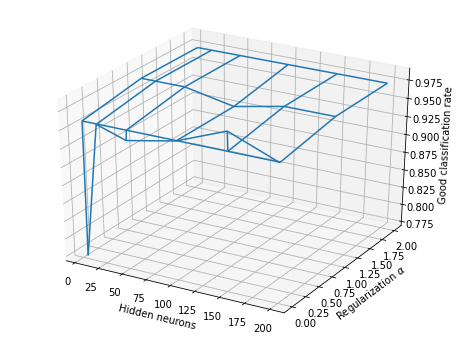

In [ ]:
n_hidden = np.array([s[0] for s in tuned_parameters['hidden_layer_sizes']])
alphas = np.array(tuned_parameters['alpha'])

# creating the hyperparameter grid
xx, yy = np.meshgrid(n_hidden, alphas)
scores = clf.cv_results_['mean_test_score'].reshape(xx.shape)

# wireframe display of the results of the evaluated models
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.set_xlabel("Hidden neurons")
ax.set_ylabel("Regularization $\\alpha$")
ax.set_zlabel("Good classification rate")
ax.plot_wireframe(xx, yy, scores)
plt.show()

# **"""Question 5: How many MLPs are learned in total in this example?"""**

In [ ]:
#answer:   6 hidden layer * 4 alpha * 5 cv= 6 *4 *5=120

# **Question 6: What is the meaning of the refit parameter of GridSearchCV?**
Refit is an estimator using the best found parameters on the whole dataset.
For multiple metric evaluation, this needs to be a str denoting the scorer that would be used to find the best parameters for refitting the estimator at the end.
Where there are considerations other than maximum score in choosing a best estimator, refit can be set to a function which returns the selected best_index_ given cv_results_. In that case, the best_estimator_ and best_params_ will be set according to the returned best_index_ while the best_score_ attribute will not be available.
The refitted estimator is made available at the best_estimator_ attribute and permits using predict directly on this GridSearchCV instance. when the refit is False the best_estmator is not available.
Also for multiple metric evaluation, the attributes best_index_, best_score_ and best_params_ will only be available if refit is set and all of them will be determined w.r.t this specific scorer.
ther is a Custom refit strategy of a grid search with cross-validation to how to design a custom selection strategy using a callable via refit.

GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, **refit=True**, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)


# **Question 7: Take a more complete look at the contents of clf.cv_results_.**

cv_results_dict of numpy (masked) ndarrays
A dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame.

for instance cv_results_ dict of:

{
'param_kernel': masked_array(data = ['poly', 'poly', 'rbf', 'rbf'],
                             mask = [False False False False]...)
'param_gamma': masked_array(data = [-- -- 0.1 0.2],
                            mask = [ True  True False False]...),
'param_degree': masked_array(data = [2.0 3.0 -- --],
                             mask = [False False  True  True]...),
'split0_test_score'  : [0.80, 0.70, 0.80, 0.93],
'split1_test_score'  : [0.82, 0.50, 0.70, 0.78],
'mean_test_score'    : [0.81, 0.60, 0.75, 0.85],
'std_test_score'     : [0.01, 0.10, 0.05, 0.08],
'rank_test_score'    : [2, 4, 3, 1],
'split0_train_score' : [0.80, 0.92, 0.70, 0.93],
'split1_train_score' : [0.82, 0.55, 0.70, 0.87],
'mean_train_score'   : [0.81, 0.74, 0.70, 0.90],
'std_train_score'    : [0.01, 0.19, 0.00, 0.03],
'mean_fit_time'      : [0.73, 0.63, 0.43, 0.49],
'std_fit_time'       : [0.01, 0.02, 0.01, 0.01],
'mean_score_time'    : [0.01, 0.06, 0.04, 0.04],
'std_score_time'     : [0.00, 0.00, 0.00, 0.01],
'params'             : [{'kernel': 'poly', 'degree': 2}, ...],
}
NOTE

The key 'params' is used to store a list of parameter settings dicts for all the parameter candidates.

The mean_fit_time, std_fit_time, mean_score_time and std_score_time are all in seconds.

For multi-metric evaluation, the scores for all the scorers are available in the cv_results_ dict at the keys ending with that scorer’s name ('_<scorer_name>') instead of '_score' shown above. (‘split0_test_precision’, ‘mean_train_precision’ etc.)

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.04321294, 0.04093037, 0.02865014, 0.02780337, 0.03670063,
        0.06375337, 0.03162689, 0.03299522, 0.02389526, 0.03934736,
        0.03882723, 0.04468102, 0.03037767, 0.0325211 , 0.04066868,
        0.05035667, 0.05829101, 0.05925889, 0.0306211 , 0.03477807,
        0.04555917, 0.057195  , 0.07507701, 0.07311749]),
 'std_fit_time': array([0.01671651, 0.02501756, 0.01938171, 0.00692712, 0.01654435,
        0.00815685, 0.00640572, 0.02887935, 0.00852419, 0.01950973,
        0.01674036, 0.01682015, 0.00243779, 0.00989008, 0.00564933,
        0.00992415, 0.01952252, 0.01526205, 0.00296777, 0.00342427,
        0.00459079, 0.00683723, 0.00677251, 0.00484552]),
 'mean_score_time': array([0.00082369, 0.00086794, 0.000631  , 0.00063624, 0.00066423,
        0.00086417, 0.00078511, 0.00058556, 0.00057964, 0.00057454,
        0.00073624, 0.00086265, 0.00054536, 0.00049253, 0.0005271 ,
        0.00050635, 0.00050626, 0.0006464 , 0.00072041, 0.00058002,
        0.000585

## **Question 8: Evaluate the selected model on the test data (X_test, y_test).**

In [ ]:
print("The score on training set: {:.2f}% \n".format((clf.score
                                                      (X_train, y_train))*100))
print("The score on test set: {:.2f}%\n".format((clf.score(X_test, y_test))*100))
print("Best Parameters: ")
print(clf.best_params_)

 # Alternately using cv_results_

print(clf.cv_results_['mean_test_score'])

print(f" max of mean_test_score is:  {max(clf.cv_results_['mean_test_score'])}")
   

The score on training set: 98.67% 

The score on test set: 98.67%

Best Parameters: 
{'alpha': 1, 'hidden_layer_sizes': (5,)}
[0.96       0.97333333 0.97333333 0.96       0.97333333 0.93333333
 0.96       0.97333333 0.97333333 0.97333333 0.96       0.97333333
 0.98666667 0.98666667 0.98666667 0.98666667 0.98666667 0.98666667
 0.97333333 0.97333333 0.98666667 0.97333333 0.97333333 0.97333333]
 max of mean_test_score is:   0.9866666666666667


# **Question 9: Do the appearance of the results encourage you to refine the grid? Edit the grid and review the new results.**

In [ ]:
tuned_parameters = {'hidden_layer_sizes':[(5,7), (20,22), (50,65), (100,110), 
                                          (150,160), (200,300)],
                    'alpha':   [0.0001,0.001, 0.01, 1, 2,4,],'max_iter'
                    :[300,350,400,500]
                   ,'activation':['relu','logestic', 'identity','tanh']
                   }
#'learning_rate_init':[0.01,0.02,0.03,0.08,0.09,0.1]
clf = GridSearchCV(MLPClassifier( random_state=333,solver='lbfgs', tol=5e-3),
                   tuned_parameters,refit=True, cv=5)

# grid search execution
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 384, in _fit
    self._validate_hyperparameters()


GridSearchCV(cv=5,
             estimator=MLPClassifier(random_state=333, solver='lbfgs',
                                     tol=0.005),
             param_grid={'activation': ['relu', 'logestic', 'identity', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01, 1, 2, 4],
                         'hidden_layer_sizes': [(5, 7), (20, 22), (50, 65),
                                                (100, 110), (150, 160),
                                                (200, 300)],
                         'max_iter': [300, 350, 400, 500]})

In [ ]:
print(f" the best estimator of model is:  {clf.best_estimator_}")
print(f" the best score of model is:  {clf.best_score_}")
print(f" the best parameter of model is:  {clf.best_params_}")
print(f" max of mean_test_score is:   {max(clf.cv_results_['mean_test_score'])}")


 the best estimator of model is:  MLPClassifier(hidden_layer_sizes=(20, 22), max_iter=300, random_state=333,
              solver='lbfgs', tol=0.005)
 the best score of model is:  0.9866666666666667
 the best parameter of model is:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 22), 'max_iter': 300}
 max of mean_test_score is:   0.9866666666666667


# **Question 10: Use randomized search with RandomizedSearchCV. The “cost” (total number of evaluated combinations) can be set with n_iter. Explain the choice of the laws used for drawing the values of the two (hyper)parameters hidden_layer_sizes and alpha.**

In [ ]:
parameters = {'hidden_layer_sizes':[(5,), (20,), (50,), (100,), (150,), (200,)],
                    'alpha':   [0.001, 0.01, 1, 2]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(MLPClassifier( random_state=333,solver='lbfgs',
  tol=5e-3), parameters, n_iter=100, cv=5, refit=True,n_jobs=-1, random_state=1)

# train the random search meta-estimator to find the best model
clf.fit(X_train, y_train)

# print winning set of hyperparameters
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", clf.best_estimator_)
print("\n The best score across ALL searched params:\n", clf.best_score_)
print("\n The best parameters across ALL searched params:\n", clf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


 Results from Random Search 

 The best estimator across ALL searched params:
 MLPClassifier(alpha=1, hidden_layer_sizes=(20,), random_state=333,
              solver='lbfgs', tol=0.005)

 The best score across ALL searched params:
 0.9866666666666667

 The best parameters across ALL searched params:
 {'hidden_layer_sizes': (20,), 'alpha': 1}


# Randomized search on hyper parameters.

# RandomizedSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

# The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.

# In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

# If all parameters are presented as a list, sampling without replacement is performed. If at least one parameter is given as a distribution, sampling with replacement is used. It is highly recommended to use continuous distributions for continuous parameters.

#** The most efficient way to find an optimal set of hyperparameters for a machine learning model is to use random search. The randomized search meta-estimator is an algorithm that trains and evaluates a series of models by taking random draws from a predetermined set of hyperparameter distributions. The algorithm picks the most successful version of the model it’s seen after training N different versions of the model with different randomly selected hyperparameter combinations, leaving you with a model trained on a near-optimal set of hyperparameters. Note that random search is called a meta-estimator because it’s not an estimator in itself, but rather an algorithm applied to an existing estimator in order to tune the estimator’s hyperparameters.**

# This method has an advantage over grid search in that the algorithm searches over distributions of parameter values rather than predetermined lists of candidate values for each hyperparameter. Being able to search over hyperparameter distributions also allows you to be more opinionated about what you expect a hyperparameter’s best value to be; if you want to draw values from a distribution that is normally, poisson, uniformly distributed, etc., you can specify it as such.

# Random search is usually used in tandem with cross validation to achieve a more reliable estimate of what each candidate model’s out of sample performance will be.

# **Question 11: Experiment with HalvingGridSearchCV. Compare the final score and the calculation time with that obtained with GridSearchCV.**

In [ ]:
parameters = {'hidden_layer_sizes':[(5,), (20,), (50,), (100,), (150,), (200,)],
                    'alpha':   [0.001, 0.01, 1, 2]}
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
clf = HalvingGridSearchCV(MLPClassifier( random_state=1234,solver='lbfgs',
                        tol=5e-3), parameters, cv=5, n_jobs=-1, random_state=1)

# train the random search meta-estimator to find the best model
clf.fit(X_train, y_train)

# print winning set of hyperparameters
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", clf.best_estimator_)
print("\n The best score across ALL searched params:\n", clf.best_score_)
print("\n The best parameters across ALL searched params:\n", clf.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 MLPClassifier(alpha=0.001, hidden_layer_sizes=(20,), random_state=1234,
              solver='lbfgs', tol=0.005)

 The best score across ALL searched params:
 0.9666666666666666

 The best parameters across ALL searched params:
 {'alpha': 0.001, 'hidden_layer_sizes': (20,)}


#**answer** 
# **According above code the HalvingGridSearchCV  is able to find parameter combinations that are just as accurate as GridSearchCV score =0.966, in much less time. **